In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import datetime as dt
import numpy as np

## Load Data

Text(0.5, 0, 'Date')

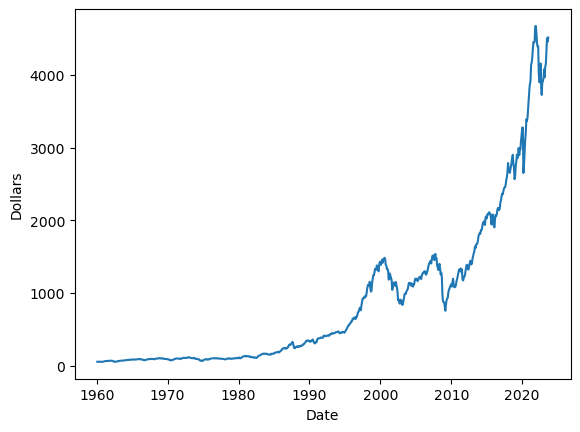

In [293]:
sp = pd.read_csv("s&p_data.csv")

#replace date column with date objects for math
sp["Date"] = [dt.date.fromisoformat(date) for date in sp["Date"].to_list()]

#fix data because october is broken
for i in range(len(sp)):
    if sp.loc[i,"Date"].month == 1: 
        if sp.loc[i + 1,"Date"].month == 11: 
            sp.loc[i,"Date"] = sp.loc[i,"Date"].replace(month = 10)



#clean up data
cut_off_date = dt.date.fromisoformat("1960-01-01")

sp = sp[sp["Date"] > cut_off_date]


plt.figure()
plt.plot(sp["Date"], sp["SP500"])
plt.ylabel("Dollars")
plt.xlabel("Date")

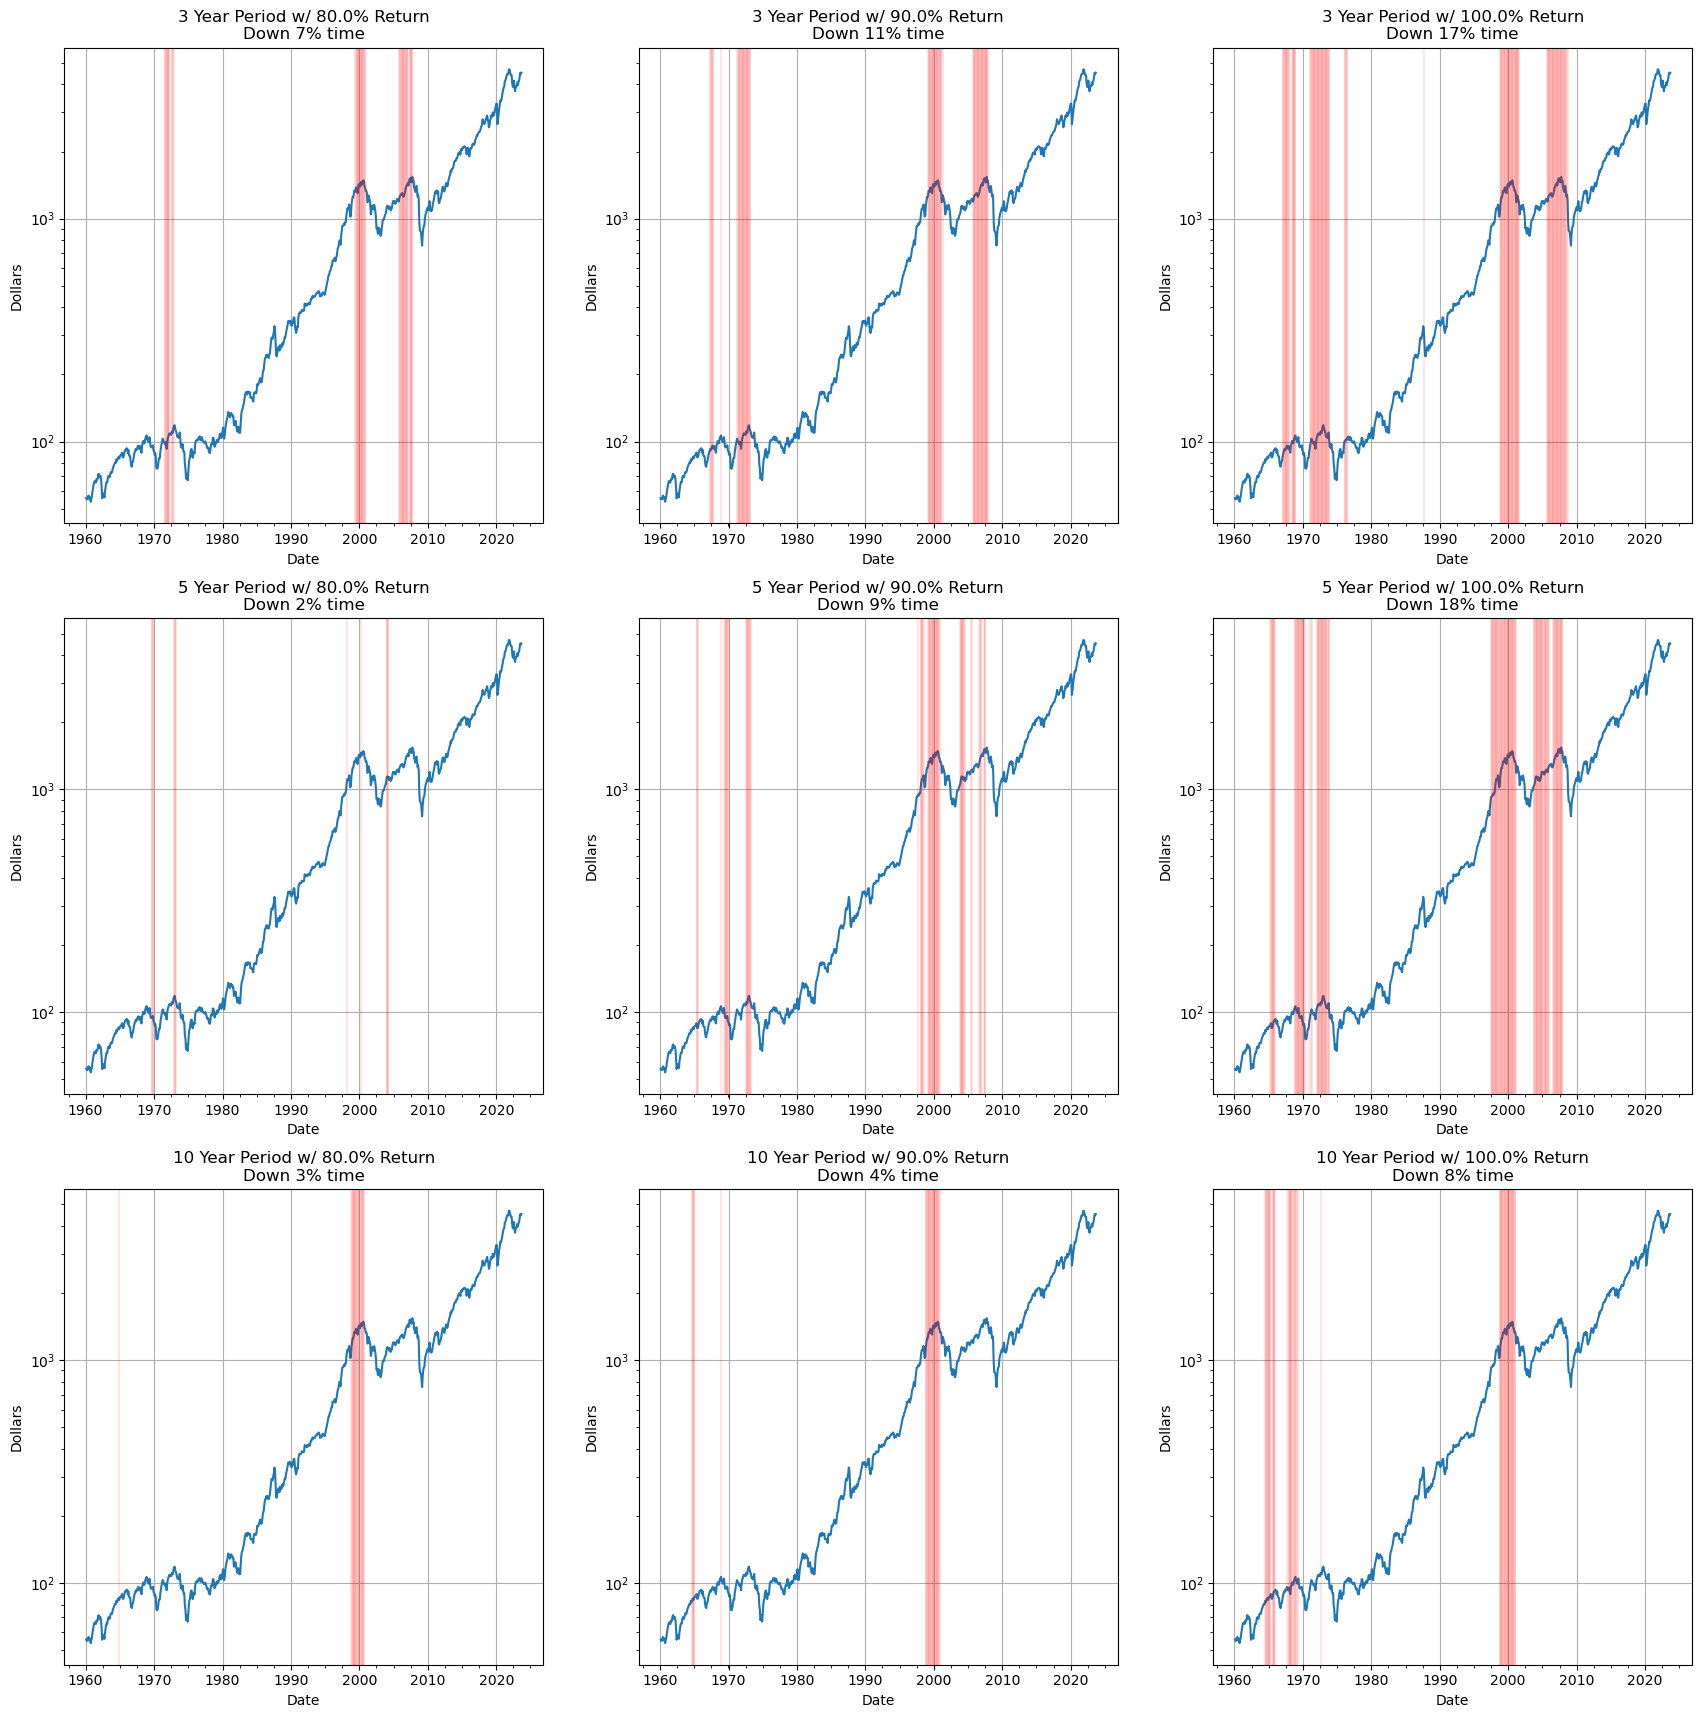

In [299]:
analysis_period_years_list = [3, 5, 10]
return_perc_list = [0.8, 0.9, 1.0]

size = 7
plt.figure(figsize=(size*len(return_perc_list),size*len(analysis_period_years_list)))
subplot = 1
for row, analysis_period_years in enumerate(analysis_period_years_list):
    for col, return_perc in enumerate(return_perc_list):

        down_market_start_dates = []
        for i in range(sp.first_valid_index(), sp.last_valid_index() - 12*analysis_period_years):
            start_date = sp.loc[i, "Date"]
            end_data = start_date.replace(year = start_date.year + analysis_period_years)

            start_price = sp.loc[i, "SP500"]
            end_price = sp.loc[i+12*analysis_period_years, "SP500"]

            if end_price/start_price < return_perc:
                down_market_start_dates.append(start_date)

        perc_down_dates = len(down_market_start_dates)/len(sp)

        plt.subplot(len(analysis_period_years_list), len(return_perc_list), subplot)
        plt.title(f"{analysis_period_years} Year Period w/ {return_perc*100}% Return\nDown {perc_down_dates*100:.0f}% time")
        plt.semilogy(sp["Date"], sp["SP500"])
        plt.ylabel("Dollars")
        plt.xlabel("Date")
        plt.grid()
        plt.minorticks_on()

        for date in down_market_start_dates:
            plt.axvline(x=date, color='red', alpha = 0.1)

        subplot += 1

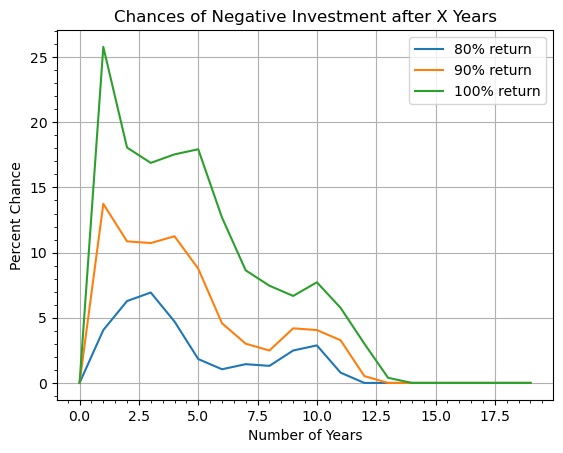

In [295]:
analysis_period_years_list = np.arange(0,20)
return_perc_list = [0.8, 0.9, 1.0]

plt.figure()


for col, return_perc in enumerate(return_perc_list):
    perc_down_dates_list = []
    for row, analysis_period_years in enumerate(analysis_period_years_list):

        down_market_start_dates = []
        for i in range(sp.first_valid_index(), sp.last_valid_index() - 12*analysis_period_years):
            start_date = sp.loc[i, "Date"]
            end_data = start_date.replace(year = start_date.year + analysis_period_years)

            start_price = sp.loc[i, "SP500"]
            end_price = sp.loc[i+12*analysis_period_years, "SP500"]

            if end_price/start_price < return_perc:
                down_market_start_dates.append(start_date)

        perc_down_dates = len(down_market_start_dates)/len(sp)
        perc_down_dates_list.append(perc_down_dates)


    
    plt.plot(analysis_period_years_list, np.array(perc_down_dates_list)*100, label = f"{return_perc*100:.0f}% return")
plt.ylabel("Percent Chance")
plt.xlabel("Number of Years")
plt.grid()
plt.minorticks_on()
plt.title("Chances of Negative Investment after X Years")
plt.legend()

In [286]:
np.mean(perc_diff)*12*40

2805.7604193971165

0.6159895150720839


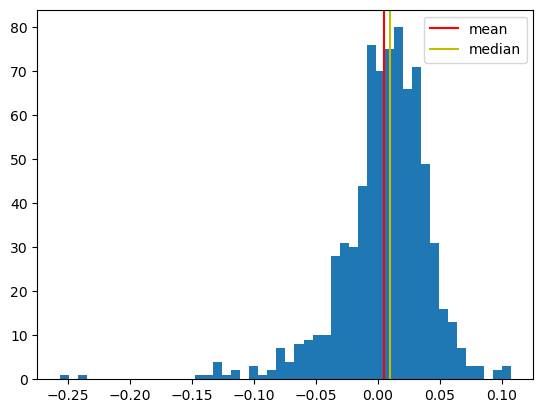

In [289]:
perc_diff = (np.array(sp["SP500"].to_list())[1:] - np.array(sp["SP500"].to_list())[:-1])/np.array(sp["SP500"].to_list())[1:]


plt.hist(perc_diff,bins=50)
plt.axvline(np.mean(perc_diff), color='r', label='mean')
plt.axvline(np.median(perc_diff), color='y', label='median')
plt.legend()

print(np.sum(perc_diff>0)/len(perc_diff))
